## Part 1: Properties of the real-world network of Computational Social Scientists

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

In [3]:
df_A = pd.read_csv("data/author_edgelist.csv")

### 1. Random Network

Calculate the probability (p) ref[Section 3.2, equation (3.2) in Network Science, Albert-Laszlo Barabasi]

In [23]:
G = nx.Graph()

edges = [(row['author_1'], row['author_2'], row['weight']) for index, row in df_A.iterrows()]

G.add_weighted_edges_from(edges)

N = G.number_of_nodes()
L_average = G.number_of_edges() #we only have one network, so the average is simply number of edges

p = L_average / ((N*(N-1))/2) 

p

0.0004608281457862164

After finding p, figure out the average degree (using the given formula)

In [5]:
# the average degree:

k = p*(N-1)
k #which is the average degree for a node in the network.

6.523944059895466

Now, write a function to generate a Random Network that mirrors the Computational Social Scientists network in terms of node count, using your calculated p. Generate a random network by linking nodes in every possible pair with probability

In [30]:
def random_network(N,p):
    
    #Start with N isolated nodes.
    R = nx.Graph()
    R.add_nodes_from(range(N))

    #Select a node pair and generate a random number between 0 and 1
    for u in range(N):
        for v in range(u+1,N):
            if np.random.rand() < p: #If the number exceeds p:
                R.add_edge(u,v) #connect the selected node pair with a link, otherwise leave them disconnected.
    return R

F = random_network(N,p)

Visualize the network as you did for the Computational Social Scientists network

In [31]:
# We add the country_code attribute to color-code the nodes

G = nx.Graph()
edges = [(row['author_1'], row['author_2'], row['weight']) for index, row in df_A.iterrows()]
G.add_weighted_edges_from(edges)

df_country = pd.read_csv("data/all_authors_from_graph.csv")
country_dict = dict(zip(df_country["id"], df_country["country_code"]))
nx.set_node_attributes(G, {k: (v if pd.notna(v) and v else "Unknown") for k, v in country_dict.items()}
                       , "group")

In [42]:
import netwulf
G_components = nx.connected_components(G)
largest_component = max(G_components, key=len)
G_giant = G.subgraph(largest_component)

netwulf.visualize(network = G_giant,
                  plot_in_cell_below=True,
                    config = {"zoom": 0.6,
                        "node_charge": -45,
                        "node_gravity": 0.1517613326051338,
                        "link_distance": 12.469395139268158,
                        "link_distance_variation": 0.16,
                        "node_collision": True,
                        "wiggle_nodes": False,
                        "freeze_nodes": False,
                        "node_fill_color": "#798caa",
                        "node_stroke_color": "#555555",
                        "node_label_color": "#000000",
                        "node_size": 50,
                        "node_stroke_width": 0.2942381212452212,
                        "node_size_variation": 0.5077143637356636,
                        "display_node_labels": False,
                        "scale_node_size_by_strength": True,
                        "link_color": "#7c7c7c",
                        "link_width": 2.7268712452211905,
                        "link_alpha": 0.5012971054068814,
                        "link_width_variation": 0.4814991807755325,
                        "display_singleton_nodes": True,
                        "min_link_weight_percentile": 0,
                        "max_link_weight_percentile": 1})

# unfortunately we was unable to add a legend for the country codes

/opt/anaconda3/envs/02467CSS/lib/python3.11/site-packages/networkx/readwrite/json_graph/node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(


(None, None)

In [37]:
F_components = nx.connected_components(F)
largest_component = max(F_components, key=len)
F_giant = F.subgraph(largest_component)

netwulf.visualize(network = F_giant,
                  plot_in_cell_below=True,
                    config = {
                    "zoom": 0.6,
                    "node_charge": -62.97788093937739,
                    "node_gravity": 0.1604997269251775,
                    "link_distance": 12.033349262697978,
                    "link_distance_variation": 0.16,
                    "node_collision": True,
                    "wiggle_nodes": False,
                    "freeze_nodes": False,
                    "node_fill_color": "#798caa",
                    "node_stroke_color": "#555555",
                    "node_label_color": "#000000",
                    "node_size": 50,
                    "node_stroke_width": 0.2942381212452212,
                    "node_size_variation": 2.2641316220644456,
                    "display_node_labels": False,
                    "scale_node_size_by_strength": True,
                    "link_color": "#7c7c7c",
                    "link_width": 1.9406779082468593,
                    "link_alpha": 0.08185417804478427,
                    "link_width_variation": 0.1669169852539596,
                    "display_singleton_nodes": True,
                    "min_link_weight_percentile": 0,
                    "max_link_weight_percentile": 1})

(None, None)

In [ ]:
Ng = F_giant.number_of_nodes()
print(f"Ng = {Ng}, N = {N}")

Ng = 14122, N = 14158


np.float64(9.558035114334135)

#### Discussion:
- *What regime does your random network fall into? Is it above or below the critical threshold?
According to the textbook, what does the network's structure resemble in this regime?*

_<k_> is approximately 6.5, which exceeds the critical threshold of _<k_> = 1. This means the network is in the supercritical regime, where a giant component emerges, forming a structure with loops and cycles. In this regime, the network resembles a dense “hairball”, indicating that it is nearly fully connected, with only a few nodes remaining outside the giant component as N_g approaches the size of N.


- *Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.*

When analyzing the CSS network, we observe that a few nodes have a very high degree, while many others have a degree below _<k_>. As shown in the plot below, the network follows a heavy-tailed degree distribution, which aligns with our initial expectations for scientific collaboration networks (Table 3.1, Network Science, Albert-László Barabási).

In contrast, the random network follows a binomial distribution, forming a bell-shaped curve centered around _<k_> = 6.5. This behavior can be confirmed in the plot below.

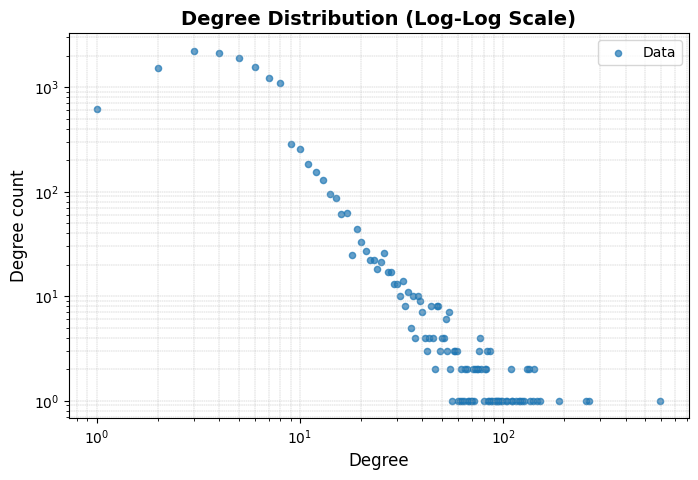

In [ ]:
degree_dict = dict(G.degree())
unique_degrees, counts = np.unique(list(degree_dict.values()), return_counts=True)

# Plot log-log scatter
plt.figure(figsize=(8, 5))
plt.scatter(unique_degrees, counts, s=20, alpha=0.7, label="Data")  # Scatter plot

# Set log scales
plt.xscale("log")
plt.yscale("log")

# Labels and title
plt.xlabel("Degree", fontsize=12)
plt.ylabel("Degree count", fontsize=12)
plt.title("Degree Distribution: CSS (Log-Log Scale)", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.3)

# Show plot
plt.show()

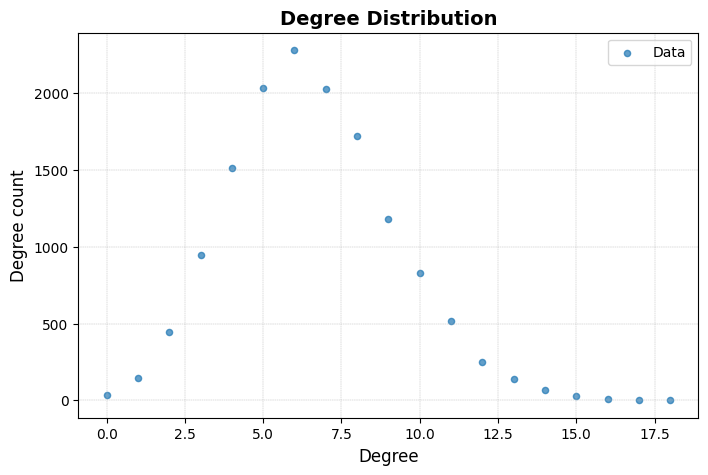

In [ ]:
degree_dict = dict(F.degree())
unique_degrees, counts = np.unique(list(degree_dict.values()), return_counts=True)

# Plot log-log scatter
plt.figure(figsize=(8, 5))
plt.scatter(unique_degrees, counts, s=20, alpha=0.7, label="Data")  # Scatter plot

# Labels and title
plt.xlabel("Degree", fontsize=12)
plt.ylabel("Degree count", fontsize=12)
plt.title("Degree Distribution: Random", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.3)

# Show plot
plt.show()

### 2. Shortest Paths

In [ ]:
# Begin by identifying the largest connected component within the Computational Social Scientists network
# - this was calculated just before as G_giant and F_giant

# Calculate the average (unweighted) shortest path length within this giant:
shortest_G = nx.average_shortest_path_length(G_giant,None)
shortest_F = nx.average_shortest_path_length(F_giant,None)


In [47]:
print(f"Average shortest path length for the giant in the random network: {shortest_F}")
print(f"Average shortest path lenght for the giant in CSS-network: {shortest_G}")

Average shortest path length for the giant in the random network: 5.302305299691908
Average shortest path lenght for the giant in CSS-network: 6.154703885601157


#### Discussion:
- *Why do you think I asked you to consider the giant component only?*

In the giant component, we expect to find the longest shortest paths, making it particularly relevant when investigating the small-world property. If we also consider the small components, we risk finding very small components with very short shortest paths, which would make it hard to tell if the average was low because of small components or actually short paths in the large component.

- *Why do you think I asked you to consider unweighted edges?*

The weights represent how many links the scientists have in terms of common papers. Therefore, they actually resemble some measure of connectedness and would be misleading to include in the search for the average shortest path.

- *Does the Computational Social Scientists network exhibit the small-world phenomenon?*

The CSS network has an average shortest path of 6.15, which means that, on average, there is a maximum of around six links between two scientists. This is not unexpectedly small in relation to the average shortest path in the random network, suggesting that the CSS network may not have small-world properties. However, the clustering coefficients calculated below indicate significantly higher clustering than the random network, which is a key characteristic of small-world networks. This suggests that it may still possess small-world characteristics, aligning more closely with other social networks than with random structures.

In [48]:
clustering_G = nx.average_clustering(G)
clustering_F = nx.average_clustering(F)

print(f"Clustering coefficient for the giant in the random network: {clustering_F}")
print(f"Clustering coefficient for the giant in CSS-network: {clustering_G}")


Clustering coefficient for the giant in the random network: 0.00038907526370444826
Clustering coefficient for the giant in CSS-network: 0.8438463383768862
